In [483]:
# Завантажуємо бібліотеки
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

data = 'california_housing.csv'
df = pd.read_csv(data)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [484]:
df.shape #розмір

(20640, 9)

In [485]:
df.isnull().sum() #NULL

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [249]:
#перевіряємо чисельні колонки
df.select_dtypes(np.number).columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [250]:
import plotly.express as px

In [337]:
corr=df.corr()

In [251]:
corr = corr.apply(lambda x: np.round(x,2)) #округлення до 2 знаку

In [252]:
px.imshow(corr, x = corr.columns, y = corr.index,
         text_auto=True)

In [253]:
corr[((corr>0.7)|(corr<-0.7)) & (corr != 1)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HouseAge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AveRooms,NaN,NaN,NaN,0.85,NaN,NaN,NaN,NaN,NaN
AveBedrms,NaN,NaN,0.85,NaN,NaN,NaN,NaN,NaN,NaN
Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AveOccup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.92,NaN
Longitude,NaN,NaN,NaN,NaN,NaN,NaN,-0.92,NaN,NaN
target,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
to_drop = ['AveBedrms','Longitude'] # висока кореляція між признаками 'AveBedrms','Longitude'
to_drop

['AveBedrms', 'Longitude']

In [255]:
corr_price = corr['target']
corr_price # 'MedInc і має найбільший вплив на target

MedInc        0.69
HouseAge      0.11
AveRooms      0.15
AveBedrms    -0.05
Population   -0.02
AveOccup     -0.02
Latitude     -0.14
Longitude    -0.05
target        1.00
Name: target, dtype: float64

In [256]:
df.select_dtypes(include=np.number).var() #дисперсія

MedInc        3.609323e+00
HouseAge      1.583963e+02
AveRooms      6.121533e+00
AveBedrms     2.245915e-01
Population    1.282470e+06
AveOccup      1.078700e+02
Latitude      4.562293e+00
Longitude     4.014139e+00
target        1.331615e+00
dtype: float64

In [351]:
x = df[df.columns.drop(to_drop+['target'])] #видаляємо тільки 2 признака з високою креляцію між собою
y = df['target']


In [352]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.2)

Проведемо стандартизацію признаків

In [315]:
x_train.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.867585,28.727592,5.419226,1422.205426,3.086795,35.625657
std,1.905761,12.604076,2.488362,1132.002642,11.442433,2.132879
min,0.499900,1.000000,0.888889,3.000000,0.692308,32.540000
25%,2.555825,18.000000,4.440932,785.000000,2.430375,33.930000
50%,3.540050,29.000000,5.232342,1166.000000,2.821158,34.260000
75%,4.739375,37.000000,6.047619,1725.000000,3.283921,37.710000
max,15.000100,52.000000,141.909091,35682.000000,1243.333333,41.950000


In [316]:
from sklearn.preprocessing import StandardScaler

In [353]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [320]:
scaler.mean_ #такі ж значення як і в x_train.describe()

array([   3.8675851 ,   28.72759205,    5.41922608, 1422.20542636,
          3.08679544,   35.6256571 ])

In [321]:
scaler.var_ #такі ж значення як і в x_train.describe()

array([      3.63170323,     158.85311949,       6.19156815,
       1281352.37628354,     130.9213509 ,       4.54889845])

In [354]:
x_train_std=pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_train_std.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,2.426999e-16,-6.583881e-17,2.132231e-16,8.896845e-17,9.830100e-18,1.732384e-15
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-1.775369e+00,-2.203155e+00,-1.898984e+00,-1.268705e+00,-2.173315e-01,-1.446525e+00
25%,-6.898122e-01,-8.521564e-01,-4.113153e-01,-5.678676e-01,-5.810007e-02,-7.986849e-01
50%,-1.811046e-01,2.201899e-02,-8.634425e-02,-2.286373e-01,-2.302505e-02,-6.448811e-01
75%,4.624289e-01,6.577829e-01,2.590713e-01,2.717050e-01,1.916660e-02,9.677286e-01
max,5.844248e+00,1.849840e+00,5.645546e+01,3.066370e+01,1.135164e+02,2.939214e+00


In [341]:
x_train_std.describe().apply(lambda x: np.round(x,4)) #округлення до 2 знаку, для кращого вигляду

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
count,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000,16512.0000
mean,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.7672,-2.2000,-1.8207,-1.2538,-0.2093,-1.4468
25%,-0.6883,-0.8511,-0.3932,-0.5629,-0.0574,-0.7950
50%,-0.1719,0.0216,-0.0751,-0.2263,-0.0232,-0.6403
75%,0.4575,0.6563,0.2525,0.2675,0.0172,0.9773
max,5.8417,1.8465,54.8530,30.2657,108.3934,2.9653


In [355]:
x_test_std=pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_test_std.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-0.020422,-0.033156,-0.015839,0.009108,0.001743,-0.027473
std,0.991428,1.000463,1.112513,1.066387,0.719740,0.977020
min,-1.775369,-2.203155,-1.665200,-1.271390,-0.212051,-1.437204
25%,-0.694147,-0.852156,-0.414926,-0.576147,-0.058868,-0.798685
50%,-0.178346,-0.057452,-0.084957,-0.236693,-0.021275,-0.658863
75%,0.434224,0.657783,0.233042,0.260069,0.022117,0.949086
max,5.844248,1.849840,52.576927,24.294400,45.707503,2.939214


In [356]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [358]:
mod = DecisionTreeRegressor(random_state=1)
mod.fit(x_train_std, y_train)
preds = mod.predict(x_test_std)


from sklearn.metrics import r2_score, mean_absolute_error
print('test_r2',r2_score(y_test, preds))
print('test_MAE',mean_absolute_error(y_test,preds))

preds_train = mod.predict(x_train_std)
print('train_r2',r2_score(y_train, preds_train))
print('train_MAE',mean_absolute_error(y_train,preds_train))
#перенавченна модель, так як на train все ідельно, а на тесті маємо слабкі значеня метрик

test_r2 0.44923079386730236
test_MAE 0.5672174588178295
train_r2 1.0
train_MAE 3.65233252771551e-17


[Text(0.5, 0.8333333333333334, 'MedInc <= 0.606\nsquared_error = 1.33\nsamples = 16512\nvalue = 2.069'),
 Text(0.25, 0.5, 'MedInc <= -0.423\nsquared_error = 0.828\nsamples = 12949\nvalue = 1.73'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'MedInc <= 1.475\nsquared_error = 1.219\nsamples = 3563\nvalue = 3.302'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

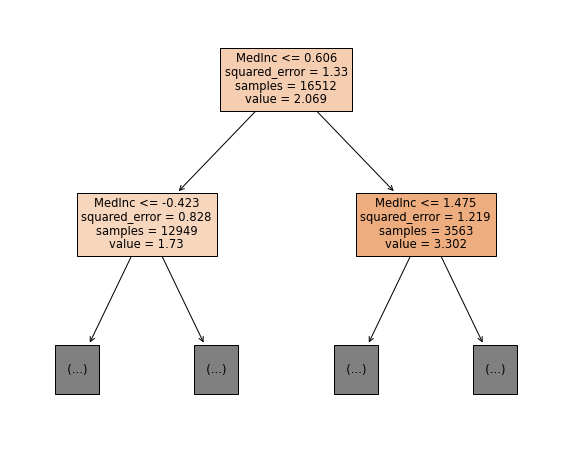

In [359]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(mod,max_depth=1, filled=True, feature_names=x_train.columns) #перший розподіл іде по MedInc

In [363]:
#дадаємо додаткові параметри DecisionTreeRegressor, методом підбору
mod = DecisionTreeRegressor(random_state=1, max_leaf_nodes=400, min_samples_leaf=24,max_depth=15)
mod.fit(x_train_std, y_train)
preds = mod.predict(x_test_std)


from sklearn.metrics import r2_score, mean_absolute_error
print('test_r2',r2_score(y_test, preds))
print('test_MAE',mean_absolute_error(y_test,preds))

preds_train = mod.predict(x_train_std)
print('train_r2',r2_score(y_train, preds_train))
print('train_MAE',mean_absolute_error(y_train,preds_train))
#метрики на тесті трохи покращились

test_r2 0.6510843981046512
test_MAE 0.4724544296818938
train_r2 0.7598075809478146
train_MAE 0.39639301822416534


In [364]:
mod.fit(x_train_std.values, y_train.values) #info

DecisionTreeRegressor(max_depth=15, max_leaf_nodes=400, min_samples_leaf=24,
                      random_state=1)

Нормалізуємо вибірку зі значеннями та перерахуємо наші моделі

In [376]:
x = df[df.columns.drop(to_drop+['target'])] #видаляємо тільки 2 признака з високою креляцію між собою
y = df['target']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=0.2)

In [377]:
from sklearn.preprocessing import MinMaxScaler

In [378]:
x_train.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.874451,28.690528,5.428246,1430.785550,3.108039,35.622470
std,1.904352,12.547878,2.568342,1152.377326,11.598718,2.127132
min,0.499900,1.000000,0.888889,3.000000,0.692308,32.540000
25%,2.562500,18.000000,4.434542,788.000000,2.433014,33.940000
50%,3.542150,29.000000,5.228256,1166.000000,2.823280,34.255000
75%,4.750000,37.000000,6.056361,1727.000000,3.289677,37.710000
max,15.000100,52.000000,141.909091,35682.000000,1243.333333,41.950000


In [379]:
mms = MinMaxScaler()
mms.fit(x_train)

MinMaxScaler()

In [380]:
mms.data_min_

array([ 0.4999    ,  1.        ,  0.88888889,  3.        ,  0.69230769,
       32.54      ])

In [381]:
x_train.min()

MedInc         0.499900
HouseAge       1.000000
AveRooms       0.888889
Population     3.000000
AveOccup       0.692308
Latitude      32.540000
dtype: float64

In [382]:
mms.data_max_

array([   15.0001    ,    52.        ,   141.90909091, 35682.        ,
        1243.33333333,    41.95      ])

In [383]:
x_train.max()

MedInc           15.000100
HouseAge         52.000000
AveRooms        141.909091
Population    35682.000000
AveOccup       1243.333333
Latitude         41.950000
dtype: float64

In [386]:
x_train_normal=pd.DataFrame(mms.transform(x_train), columns=x_train.columns)
x_train_normal

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
0,0.405670,0.333333,0.045889,0.023179,0.001778,0.117960
1,0.301154,0.254902,0.042808,0.034558,0.001905,0.209352
2,0.149660,0.627451,0.037293,0.011828,0.001851,0.224230
3,0.210673,0.686275,0.033473,0.018751,0.001515,0.548353
4,0.045868,0.509804,0.033908,0.016564,0.001317,0.689692
...,...,...,...,...,...,...
16507,0.284217,0.274510,0.031433,0.071891,0.002608,0.536663
16508,0.244721,0.274510,0.031918,0.039547,0.001355,0.133900
16509,0.241383,0.588235,0.026966,0.019675,0.001019,0.173220
16510,0.217983,0.725490,0.027497,0.018947,0.002715,0.144527


In [388]:
x_test_normal=pd.DataFrame(mms.transform(x_test), columns=x_test.columns)
x_test_normal

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
0,0.169956,0.921569,0.033043,0.032708,0.001791,0.154091
1,0.350657,0.490196,0.032665,0.028056,0.001944,0.178533
2,0.270693,0.666667,0.033146,0.022086,0.001741,0.482465
3,0.351168,0.313725,0.036203,0.060147,0.001938,0.482465
4,0.145322,0.176471,0.076188,0.028504,0.001626,0.179596
...,...,...,...,...,...,...
4123,0.208818,0.921569,0.029848,0.018134,0.001417,0.554729
4124,0.461001,0.764706,0.033542,0.010819,0.001572,0.143464
4125,0.240307,0.333333,0.037173,0.021049,0.002093,0.431456
4126,0.128081,1.000000,0.036301,0.025337,0.001421,0.854410


Навчаємо модель на нормалізованій вибірці

In [392]:
mod = DecisionTreeRegressor(random_state=1)
mod.fit(x_train_normal, y_train)
preds = mod.predict(x_test_normal)


from sklearn.metrics import r2_score, mean_absolute_error
print('test_r2',r2_score(y_test, preds))
print('test_MAE',mean_absolute_error(y_test,preds))

preds_train = mod.predict(x_train_normal)
print('train_r2',r2_score(y_train, preds_train))
print('train_MAE',mean_absolute_error(y_train,preds_train))
#перенавченна модель, на train все ідельно, а на тесті маємо слабкі значеня метрик

test_r2 0.4712830537152356
test_MAE 0.5654112984496124
train_r2 1.0
train_MAE 3.5770267024017885e-17


In [394]:
#дадаємо додаткові параметри на дерево
mod = DecisionTreeRegressor(random_state=1, max_leaf_nodes=400, min_samples_leaf=24,max_depth=15)
mod.fit(x_train_normal, y_train)
preds = mod.predict(x_test_normal)


from sklearn.metrics import r2_score, mean_absolute_error
print('test_r2',r2_score(y_test, preds))
print('test_MAE',mean_absolute_error(y_test,preds))

preds_train = mod.predict(x_train_normal)
print('train_r2',r2_score(y_train, preds_train))
print('train_MAE',mean_absolute_error(y_train,preds_train))
#метрики на тесті трохи покращились

test_r2 0.675137169569686
test_MAE 0.4531253713584642
train_r2 0.7574575880816807
train_MAE 0.3952323738841076



Валідація

In [432]:
#розп на train, val
X_train, X_val_train, Y_train, y_val_train = train_test_split(x_train_normal, y_train, 
                                                    test_size=0.2, 
                                                    shuffle=True)

In [436]:
#дадаємо додаткові параметри DecisionTreeRegressor, методом підбору
mod = DecisionTreeRegressor(random_state=1, max_leaf_nodes=400, min_samples_leaf=24,max_depth=15)
mod.fit(X_train, Y_train)
preds = mod.predict(X_val_train)


from sklearn.metrics import r2_score, mean_absolute_error
print('val_r2',r2_score(y_val_train, preds))
print('val_MAE',mean_absolute_error(y_val_train,preds))

preds_train = mod.predict(X_train)
print('train_r2',r2_score(Y_train, preds_train))
print('train_MAE',mean_absolute_error(Y_train,preds_train))
#метрики на тесті трохи покращились

val_r2 0.6680283104148522
val_MAE 0.4679686798707419
train_r2 0.7503666444854915
train_MAE 0.4016087639900316


In [433]:
#розп на test, val
X_test, X_val_test, Y_test, y_val_test = train_test_split(x_test_normal, y_test, 
                                                    test_size=0.2, 
                                                    shuffle=True)

In [438]:
#дадаємо додаткові параметри DecisionTreeRegressor, методом підбору
mod = DecisionTreeRegressor(random_state=1, max_leaf_nodes=400, min_samples_leaf=24,max_depth=15)
mod.fit(X_test, Y_test)
preds = mod.predict(X_val_train)


from sklearn.metrics import r2_score, mean_absolute_error
print('val_r2',r2_score(y_val_train, preds))
print('val_MAE',mean_absolute_error(y_val_train,preds))

preds_train = mod.predict(X_test)
print('train_r2',r2_score(Y_test, preds_train))
print('train_MAE',mean_absolute_error(Y_test,preds_train))
#метрики на тесті трохи покращились

val_r2 0.635922807565354
val_MAE 0.5019326602177736
train_r2 0.7224619167411337
train_MAE 0.4319502760623792



Зберігання моделі у pickle_format

In [441]:
import pickle

In [442]:
#Зберегти модель
pickle.dump(mod, open('model.pickle','wb'))

In [443]:
#перевірка/считування
mod = pickle.load(open('model.pickle','rb'))

In [444]:
mod

DecisionTreeRegressor(max_depth=15, max_leaf_nodes=400, min_samples_leaf=24,
                      random_state=1)

Зберігання у іншому вигляді

In [459]:
my_model = {'features':['MedInc','HouseAge','AveRooms','Population','AveOccup','Latitude'],
           'model': mod}

In [460]:
pickle.dump(my_model, open('my_model.pickle','wb'))

In [461]:
my_model

{'features': ['MedInc',
  'HouseAge',
  'AveRooms',
  'Population',
  'AveOccup',
  'Latitude'],
 'model': DecisionTreeRegressor(max_depth=15, max_leaf_nodes=400, min_samples_leaf=24,
                       random_state=1)}

In [480]:
#Загрузка data файлу для зчитуання з папки
np.savetxt("california_housing.csv", df, delimiter=',',header="MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target")